<a href="https://colab.research.google.com/github/saieswaramurali/RECOGNITION_OF_TAMIL_CHARACTERS_USING_CNN/blob/main/RECOGNITION_OF_TAMIL_CHARACTERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# to create the dataset out of folders of images of the data
!pip install imutils

In [ ]:
from imutils import paths
import cv2
import os

In [ ]:
imagepaths = list(paths.list_images("/content/drive/MyDrive/ML/tamilCharData"))

In [ ]:
print(imagepaths)

['/content/drive/MyDrive/ML/tamilCharData/1--57.jpg', '/content/drive/MyDrive/ML/tamilCharData/4--55.jpg', '/content/drive/MyDrive/ML/tamilCharData/5--56.jpg', '/content/drive/MyDrive/ML/tamilCharData/5--58.jpg', '/content/drive/MyDrive/ML/tamilCharData/7--59.jpg', '/content/drive/MyDrive/ML/tamilCharData/12--55.jpg', '/content/drive/MyDrive/ML/tamilCharData/6--61.jpg', '/content/drive/MyDrive/ML/tamilCharData/7--55.jpg', '/content/drive/MyDrive/ML/tamilCharData/2--60.jpg', '/content/drive/MyDrive/ML/tamilCharData/10--60.jpg', '/content/drive/MyDrive/ML/tamilCharData/1--60.jpg', '/content/drive/MyDrive/ML/tamilCharData/11--60.jpg', '/content/drive/MyDrive/ML/tamilCharData/3--63.jpg', '/content/drive/MyDrive/ML/tamilCharData/9--57.jpg', '/content/drive/MyDrive/ML/tamilCharData/1--61.jpg', '/content/drive/MyDrive/ML/tamilCharData/6--59.jpg', '/content/drive/MyDrive/ML/tamilCharData/8--61.jpg', '/content/drive/MyDrive/ML/tamilCharData/4--56.jpg', '/content/drive/MyDrive/ML/tamilCharData/4

In [ ]:
# function to convert rgb to grayscale

def rgb2gray(img) :
  r = img[ :, :, 0]
  g = img[ :, :, 1]
  b = img[ :, :, 2]

  return (0.2989 * r + 0.5870 * g + 0.1140 * b)


In [ ]:
#storing the image from the imagepaths

images = []

for image in imagepaths :
  try :
    img = cv2.imread(image) # reading and storing the images on the img literal
    img = rgb2gray(img) # converting the image to gray scale
    img = cv2.resize(img, (30,30)) # resizing them from 480,480 to 30,30 to reduce the computations
    images.append(img)
    print("image loaded")
  except Exception as e :
    print(f"you got {e} error")


In [ ]:
images[0].shape

(30, 30)

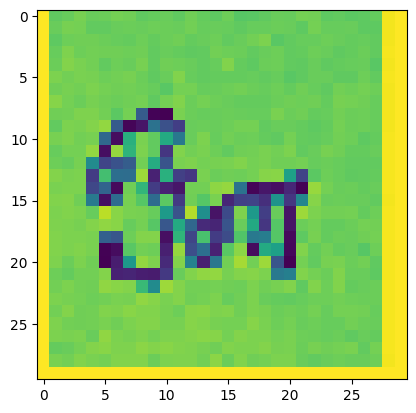

In [ ]:
plt.imshow(images[550])

In [ ]:
# to produce the label name using the name of image in the image path
labels = []

for i in imagepaths :
  labels.append(i[40::] )

print(labels[550])

12--3.jpg


In [ ]:
def returnlabel(name) :
  index = 0
  while name[index] != "-" :
    index += 1
  name = name[0:index:1]
  return name



In [ ]:
final_labels = []
for label in labels :
  lab = returnlabel(label)
  final_labels.append(lab)



In [ ]:
labels = final_labels.copy()
labels[0]

'1'

In [ ]:
for i in labels :
  print(i)

In [ ]:
# now splitting the training and splitting datasets
train_images = []
train_labels = []

for i in range(1000) :
  train_images.append(images[i])
  train_labels.append(int(labels[i]))

test_images = []
test_labels = []
for i in range(1000, 1200) :
  test_images.append(images[i])
  test_labels.append(int(labels[i]))


class_labels =  ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ']


In [ ]:
print(train_labels)

[1, 4, 5, 5, 7, 12, 6, 7, 2, 10, 1, 11, 3, 9, 1, 6, 8, 4, 4, 4, 7, 3, 5, 12, 7, 5, 1, 4, 10, 8, 1, 9, 2, 11, 2, 2, 7, 8, 9, 5, 2, 12, 9, 11, 5, 6, 9, 3, 7, 8, 11, 3, 6, 4, 12, 6, 10, 4, 7, 11, 10, 10, 1, 4, 8, 11, 2, 2, 6, 5, 4, 5, 7, 9, 5, 4, 1, 8, 8, 3, 9, 7, 8, 11, 2, 6, 12, 1, 5, 6, 10, 11, 12, 8, 7, 8, 12, 1, 3, 9, 3, 12, 2, 9, 3, 7, 5, 12, 9, 10, 5, 2, 7, 6, 1, 10, 3, 3, 4, 9, 6, 11, 2, 1, 7, 9, 11, 8, 11, 5, 2, 4, 10, 11, 5, 10, 2, 9, 1, 9, 12, 10, 6, 8, 4, 1, 8, 12, 12, 9, 3, 9, 7, 11, 3, 3, 12, 2, 8, 2, 7, 7, 2, 7, 5, 12, 4, 4, 6, 11, 11, 3, 10, 8, 9, 7, 5, 10, 4, 1, 5, 4, 5, 7, 6, 11, 3, 3, 11, 7, 5, 2, 9, 6, 12, 8, 2, 4, 9, 10, 8, 5, 6, 1, 6, 1, 4, 10, 1, 12, 8, 3, 9, 6, 1, 1, 4, 6, 8, 3, 4, 8, 3, 6, 8, 11, 2, 1, 4, 5, 4, 2, 8, 2, 4, 10, 9, 1, 7, 10, 6, 7, 8, 8, 9, 2, 1, 10, 3, 5, 5, 9, 5, 9, 9, 6, 5, 11, 6, 12, 11, 12, 12, 10, 1, 3, 11, 7, 4, 3, 2, 11, 10, 1, 7, 5, 12, 2, 11, 12, 7, 12, 8, 3, 10, 10, 2, 8, 2, 1, 5, 6, 12, 9, 11, 5, 5, 7, 5, 9, 7, 9, 1, 4, 4, 12, 7, 10, 11, 

In [60]:
# assining the train_labels to 0-11 instead of 1-12
for i in range(len(train_labels)) :
  train_labels[i] -= 1


In [61]:
print(train_labels)

[0, 3, 4, 4, 6, 11, 5, 6, 1, 9, 0, 10, 2, 8, 0, 5, 7, 3, 3, 3, 6, 2, 4, 11, 6, 4, 0, 3, 9, 7, 0, 8, 1, 10, 1, 1, 6, 7, 8, 4, 1, 11, 8, 10, 4, 5, 8, 2, 6, 7, 10, 2, 5, 3, 11, 5, 9, 3, 6, 10, 9, 9, 0, 3, 7, 10, 1, 1, 5, 4, 3, 4, 6, 8, 4, 3, 0, 7, 7, 2, 8, 6, 7, 10, 1, 5, 11, 0, 4, 5, 9, 10, 11, 7, 6, 7, 11, 0, 2, 8, 2, 11, 1, 8, 2, 6, 4, 11, 8, 9, 4, 1, 6, 5, 0, 9, 2, 2, 3, 8, 5, 10, 1, 0, 6, 8, 10, 7, 10, 4, 1, 3, 9, 10, 4, 9, 1, 8, 0, 8, 11, 9, 5, 7, 3, 0, 7, 11, 11, 8, 2, 8, 6, 10, 2, 2, 11, 1, 7, 1, 6, 6, 1, 6, 4, 11, 3, 3, 5, 10, 10, 2, 9, 7, 8, 6, 4, 9, 3, 0, 4, 3, 4, 6, 5, 10, 2, 2, 10, 6, 4, 1, 8, 5, 11, 7, 1, 3, 8, 9, 7, 4, 5, 0, 5, 0, 3, 9, 0, 11, 7, 2, 8, 5, 0, 0, 3, 5, 7, 2, 3, 7, 2, 5, 7, 10, 1, 0, 3, 4, 3, 1, 7, 1, 3, 9, 8, 0, 6, 9, 5, 6, 7, 7, 8, 1, 0, 9, 2, 4, 4, 8, 4, 8, 8, 5, 4, 10, 5, 11, 10, 11, 11, 9, 0, 2, 10, 6, 3, 2, 1, 10, 9, 0, 6, 4, 11, 1, 10, 11, 6, 11, 7, 2, 9, 9, 1, 7, 1, 0, 4, 5, 11, 8, 10, 4, 4, 6, 4, 8, 6, 8, 0, 3, 3, 11, 6, 9, 10, 9, 0, 4, 5, 9, 8, 1, 1,

ஆ


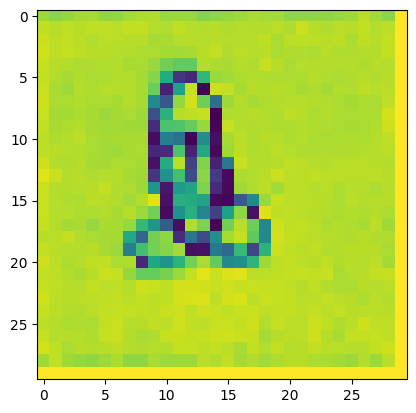

In [62]:
plt.imshow(train_images[100])
a = train_labels[100]
print(class_labels[a - 1])

In [63]:
X_train = np.array(train_images)
y_train = np.array(test_images)
X_train.shape, y_train.shape

X_train = X_train / 255  # feature scaling to reduce the magnitude of the weights involved in the network
y_train = y_train / 255  # ,,,


In [64]:
'''
X_train.reshape(1000,30,30,1)
y_train.reshape(200,30,30,1)
'''

'\nX_train.reshape(1000,30,30,1)\ny_train.reshape(200,30,30,1)\n'

In [65]:

X_labels = np.array(train_labels)
y_labels = np.array(test_labels)

In [66]:
type(X_labels) , X_labels[100]


(numpy.ndarray, 2)

In [ ]:
print(X_train[125])

In [ ]:
print(X_labels)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30,30,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [86]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 2, 2, 128)       

In [87]:
model.fit(X_train, X_labels, epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 39ms/step - loss: 2.4873 - accuracy: 0.0880
Epoch 2/10
32/32 [==============================] - 1s 39ms/step - loss: 2.4071 - accuracy: 0.1350
Epoch 3/10
32/32 [==============================] - 1s 39ms/step - loss: 2.0192 - accuracy: 0.2790
Epoch 4/10
32/32 [==============================] - 2s 65ms/step - loss: 1.5981 - accuracy: 0.4360
Epoch 5/10
32/32 [==============================] - 2s 67ms/step - loss: 1.2873 - accuracy: 0.5530
Epoch 6/10
32/32 [==============================] - 2s 66ms/step - loss: 1.1176 - accuracy: 0.5930
Epoch 7/10
32/32 [==============================] - 2s 47ms/step - loss: 0.9744 - accuracy: 0.6670
Epoch 8/10
32/32 [==============================] - 1s 39ms/step - loss: 0.8778 - accuracy: 0.6930
Epoch 9/10
32/32 [==============================] - 1s 39ms/step - loss: 0.7891 - accuracy: 0.7080
Epoch 10/10
32/32 [==============================] - 1s 40ms/step - loss: 0.6922 - accuracy: 0.7620


In [101]:
m = model.predict(y_train, verbose=1)
n = np.argmax(m[150])
print(m[0])

7/7 [==============================] - 0s 19ms/step
[1.5715100e-06 1.5702479e-05 1.1314306e-03 3.1995423e-08 6.9653943e-08
 4.0588177e-09 9.2569636e-08 2.6411022e-04 1.9253187e-02 1.7983936e-01
 7.9949450e-01 1.8355385e-08]


ஈ


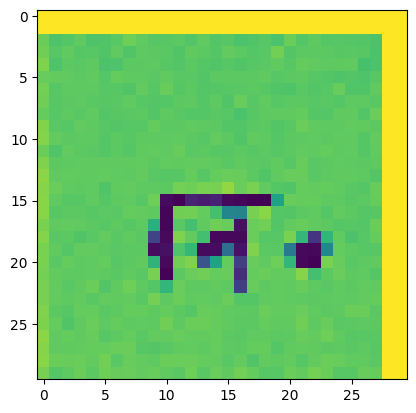

In [102]:
plt.imshow(y_train[150])
print(class_labels[n])